In [1]:
from axi_stream_driver import NeuralNetworkOverlay
import numpy as np
from pynq import MMIO

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [2]:
first = X_test[0]
print(first)

[-0.11950312  0.40616292 -1.04058613 -0.82473132 -0.75533621 -0.58097338
  1.98691601  1.53806275  1.98691601  0.6312378   0.38356148 -0.20130531
  1.05976638  0.40865762 -1.01995561 -0.18016747]


In [3]:
nn = NeuralNetworkOverlay('nn.bit', X_test[0].shape, y_test[0].shape)


In [4]:
y_hw, latency, throughput = nn.predict(X_test[0], profile=True)

Classified 16 samples in 0.004725 seconds (3386.2433862433863 inferences / s)


In [5]:
xadc = nn.ip_dict['xadc_wiz_0']
print(xadc)

{'type': 'xilinx.com:ip:xadc_wiz:3.3', 'mem_id': 's_axi_lite', 'memtype': 'REGISTER', 'gpio': {}, 'interrupts': {}, 'parameters': {'c_component_name': 'design_1_xadc_wiz_0_0', 'C_SIM_FILE_SEL': 'Default', 'C_SIM_FILE_REL_PATH': './', 'C_SIM_FILE_NAME': 'design', 'C_HAS_DCLK': '1', 'C_HAS_DRP': '0', 'C_HAS_RESET': '0', 'C_HAS_CONVST': '0', 'C_HAS_CONVSTCLK': '0', 'C_HAS_VP': '1', 'C_HAS_VN': '1', 'C_HAS_CHANNEL': '1', 'C_HAS_EOC': '1', 'C_HAS_EOS': '1', 'C_HAS_BUSY': '1', 'C_HAS_JTAGLOCKED': '0', 'C_HAS_JTAGMODIFIED': '0', 'C_HAS_JTAGBUSY': '0', 'C_HAS_EXTERNAL_MUX': '0', 'C_EXTERNAL_MUX_CHANNEL': 'VP_VN', 'C_EXTERNAL_MUXADDR_ENABLE': '0', 'C_DCLK_FREQUENCY': '100', 'C_SAMPLING_RATE': '961538.4615384615', 'C_HAS_OT_ALARM': '1', 'C_HAS_USER_TEMP_ALARM': '1', 'C_HAS_VCCINT_ALARM': '1', 'C_HAS_VCCAUX_ALARM': '1', 'C_HAS_VBRAM_ALARM': '0', 'C_HAS_VCCPINT_ALARM': '1', 'C_HAS_VCCPAUX_ALARM': '1', 'C_HAS_VCCDDRO_ALARM': '1', 'C_CONFIGURATION_R0': '1', 'C_CONFIGURATION_R1': '12704', 'C_CONFIGUR

In [6]:
xadc_base_address = nn.ip_dict['xadc_wiz_0']['phys_addr']
xadc_address_range = nn.ip_dict['xadc_wiz_0']['addr_range']

xadc_mmio = MMIO(xadc_base_address, xadc_address_range)
# 读取 VCCINT 电压值（一般在地址 0x240）
vccint_raw = xadc_mmio.read(0x204)
# 转换电压值
vccint_voltage = (vccint_raw / 65536) * 3.0  # 这个公式可能需要根据实际的缩放比例调整
print(f"VCCINT Voltage: {vccint_voltage:.3f} V")

rounded_vol = round(vccint_voltage, 5)
print(rounded_vol)


VCCINT Voltage: 1.024 V
1.0237


In [7]:
vols = []
from pynq import MMIO

def nn_ip():
    # 假设 'overlay' 已经被正确加载，并且 'addertwo_0' IP核已经被实例化
    #nn = NeuralNetworkOverlay('nn.bit', X_test[0].shape, y_test[0].shape)

    y_hw, latency, throughput = nn.predict(X_test[0], profile=True)
    
def evaluator_ip(stop_event):
    
    #xadc_base_address = nn.ip_dict['xadc_wiz_0']['phys_addr']
    #xadc_address_range = nn.ip_dict['xadc_wiz_0']['addr_range']
    
    #xadc_mmio = MMIO(xadc_base_address, xadc_address_range)
    
    while not stop_event.is_set():
        
        vccint_raw = xadc_mmio.read(0x204)
        # 转换电压值
        vccint_voltage = (vccint_raw / 65536) * 3.0  # 这个公式可能需要根据实际的缩放比例调整
        #rounded_vol = round(vccint_voltage, 5)
        print(f"VCCINT Voltage: {vccint_voltage:.3f} V")
        vols.append(vccint_voltage)

VCCINT Voltage: 1.025 V
VCCINT Voltage: 1.025 V
VCCINT Voltage: 1.022 V
VCCINT Voltage: 1.025 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.022 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.024 V
VCCINT Voltage: 1.022 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.024 V
VCCINT Voltage: 1.025 V
VCCINT Voltage: 1.024 V
VCCINT Voltage: 1.024 V
VCCINT Voltage: 1.026 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.021 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.025 V
VCCINT Voltage: 1.024 V
VCCINT Voltage: 1.026 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.022 V
VCCINT Voltage: 1.022 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.025 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.026 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.024 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.024 V
VCCINT Voltage: 1.022 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 1.022 V
VCCINT Voltage: 1.022 V
VCCINT Voltage: 1.023 V
VCCINT Voltage: 

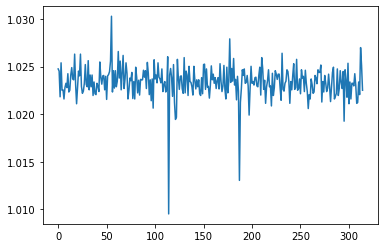

In [26]:
import threading
#import matplotlib.pyplot as plt
vols = []

    
stop_event = threading.Event()

    # 创建 evaluator_ip 线程
evaluator_thread = threading.Thread(target=evaluator_ip, args=(stop_event,))

    # 创建 use_adder_ip 线程
adder_thread = threading.Thread(target=nn_ip)

    # 启动 evaluator_ip 线程
evaluator_thread.start()

    # 启动 use_adder_ip 线程
adder_thread.start()

    # 等待 use_adder_ip 线程完成
adder_thread.join()

    # 设置事件，通知 evaluator_ip 停止
stop_event.set()

    # 等待 evaluator_ip 线程完成
evaluator_thread.join()

#print(vols)
plt.plot(vols)# 显示图形
plt.show()

In [22]:
import matplotlib.pyplot as plt

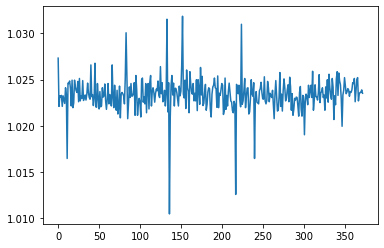

In [23]:

#print(vols)
plt.plot(vols)# 显示图形
plt.show()